# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [0]:
import torch
from torchvision import datasets, transforms
from torch import nn
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [8]:
print(trainloader)

Here we can see one of the images.

tensor([7, 1, 9, 1, 3, 4, 4, 4, 4, 9, 7, 9, 7, 4, 9, 2, 0, 1, 3, 3, 7, 6, 5, 7,
        9, 1, 1, 4, 6, 9, 4, 3, 9, 7, 4, 9, 8, 4, 4, 6, 7, 4, 0, 6, 3, 2, 4, 6,
        0, 7, 5, 6, 6, 2, 1, 3, 3, 6, 9, 5, 4, 4, 7, 2])


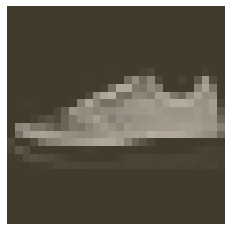

In [6]:
import helper
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [20]:
# TODO: Define your network architecture here
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 10),
    nn.LogSoftmax(dim = 1)
)

print(model)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)




Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=10, bias=True)
  (7): LogSoftmax()
)


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [21]:
# TODO: Create the network, define the criterion and optimizer
EPOCHS = 10
for e in range(EPOCHS):
    running_loss = 0
    for image, label in trainloader:
        # Flatten MNIST images into a 784 long vector
        image = image.view(image.shape[0], -1)
        optimizer.zero_grad()

        # Output for model
        logits = model(image)
        # Calculating loss 
        loss = criterion(logits, label)
        # Backward pass 
        loss.backward()
        # Optimizer step for upgrading parameters 
        optimizer.step()

        running_loss += loss.item()
    else:
        print('Training loss for the epoch{}: {}'.format(e, running_loss/len(trainloader)))


Training loss for the epoch0: 0.5655460597546116
Training loss for the epoch1: 0.44408323124908944
Training loss for the epoch2: 0.4273660895762159
Training loss for the epoch3: 0.4094021845458032
Training loss for the epoch4: 0.40819378499029035
Training loss for the epoch5: 0.40125578224087066
Training loss for the epoch6: 0.3935407095118118
Training loss for the epoch7: 0.3812695525046478
Training loss for the epoch8: 0.3770019440635689
Training loss for the epoch9: 0.379890524994717


In [0]:
# TODO: Train the network here


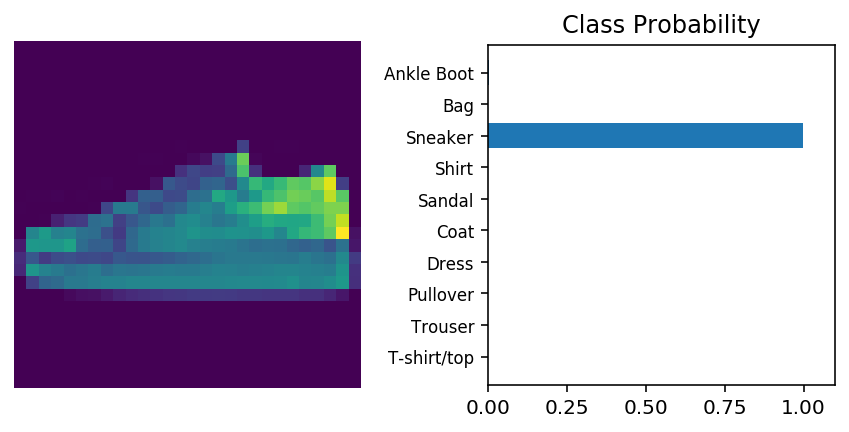

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
label = labels[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
optimizer.zero_grad()
logit = model(img)
ps = nn.functional.softmax(logit, dim = 1)
# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')